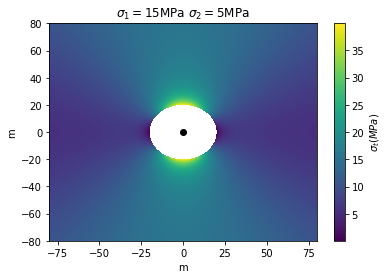

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as c

#################DATA INPUT #####################################
## Introdução de dados (se quiser usar outras unidades, é só mudar na legenda, no final do código)
## DATA INPUT (units could be other, you just have to change the title, labels and colorbar names at the end of the code)
a = 20 # raio da escavação, em m ## excavation radius (m)
dist = 4*a # distância máxima desenhada, desde o centro da escavação 
## dist is the maximum distance to plot, from the excavation center
res = 60*dist # resolução ## plot resolution
SH = 15 #Uma das duas sigmas principais,que será desenhada na horizontal, em Mpa
SV = 5
## SH and SV are the principal stresses, that shall be plotted horizontal and vertical respectively
####################           ##########################


##Simple kirsch solution plot for stresses concentration around an excavation on linear elastic continuum medium
############################################################
################## No need to change #####################
#Geração da malha de pontos onde serão feitos os cálculos; em coordenadas cartesianas
#matriz xv terá os xis. Matriz yv terá os ys
## Mesh generation on cartesian axes
x = np.linspace(-dist, dist, res)
y = np.linspace(-dist, dist, res)
xv, yv = np.meshgrid(x, y)
nfil , ncol = xv.shape

#Funções para passar a coordenadas polares
## Functions for polar conversion
def rho(x,y):
    return np.sqrt(x**2+y**2)

def teta(x,y):
    if x == 0:
        return np.arctan(y/0.0001)
    else:
        return np.arctan(y/x)

# Funções com as equações de Kirsch para calcular as tensões radiais (sr); tangencias(st) e cisalhantes(tau) em cada ponto
## Kisch equations for radial stress (sr); tangential (st) and shear (tau)
def sr(x,y):
    return ((SH+SV)/2)*(1-a**2/rho(x,y)**2)+((SH-SV)/2)*(1-4*a**2/rho(x,y)**2+3*a**4/rho(x,y)**4)*np.cos(2*teta(x,y))

def st(x,y):
    return ((SH+SV)/2)*(1+a**2/rho(x,y)**2)-((SH-SV)/2)*(1+3*a**4/rho(x,y)**4)*np.cos(2*teta(x,y))

def tau(x,y):
    return -((SH-SV)/2)*(1+2*a**2/rho(x,y)**2-3*a**4/rho(x,y)**4)*np.sin(2*teta(x,y))
#######################                  ################################


############################# PLOT OPTIONS     ####################
############################# OPÇÕES DO GRÁFICO ####################
#desenho da função desejada: escolha a equação de Kirsch a representar
# please choose the Kirsch equation to plot
Z = np.zeros([nfil,ncol])
for f in range(nfil):
    for c in range(ncol):
        if rho(xv[f,c],yv[f,c]) >= a:
            Z[f,c]=st(xv[f,c],yv[f,c]) #pode mudar aqui entre st, sr e tau # choose here: st, sr or tau
        else:
            Z[f,c]=np.nan

#plotagem com 
plt.pcolormesh(xv, yv, Z)
plt.colorbar(label='$\sigma_t(MPa)$') # mude aqui entre: #choose among# (label='$\sigma_t(MPa)$'), (label='$\sigma_r(MPa)$') e (label='$\tau(MPa)$')
plt.xlabel("m")
plt.ylabel("m")
plt.title('$\sigma_H=$'+ str(SH)+ 'MPa $\sigma_V=$'+ str(SV)+'MPa')
plt.scatter([0],[0], c='k')
plt.show()